/tmp/ipykernel_159/623237198.py:34: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-m * x) + b * np.exp(-192*m + m * x)


m: -0.13969792549274715
a: 4.810206008502467e-06
b: 4.528856140512792e-06


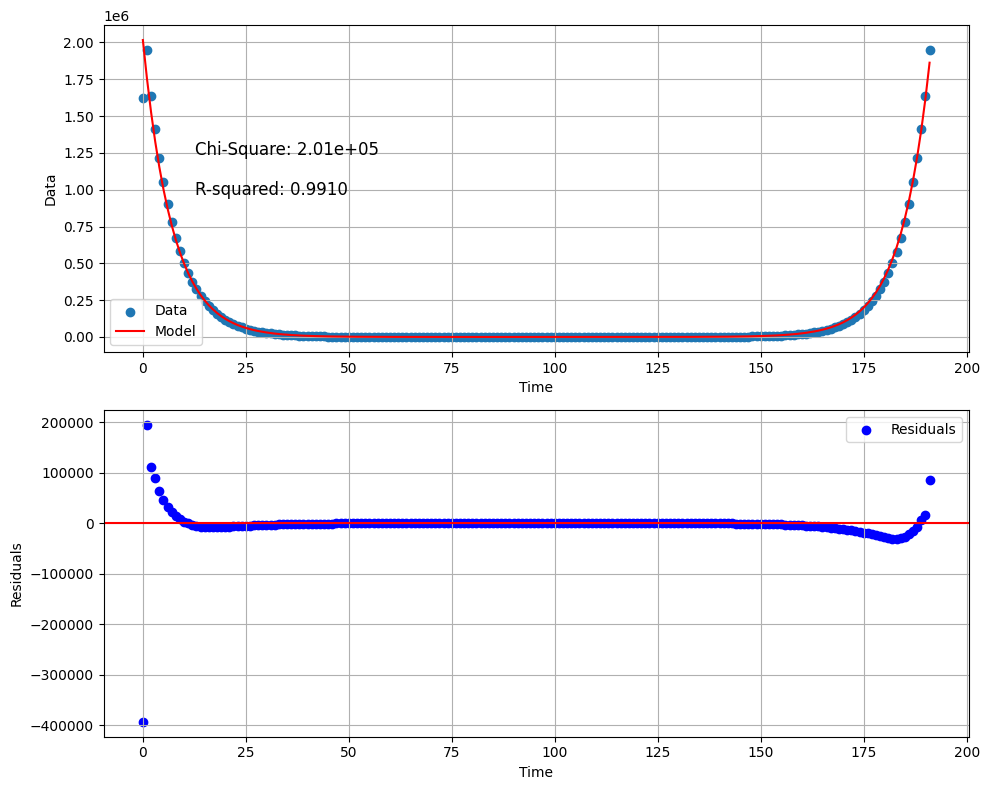

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data = pd.read_csv('pscalar_0p0018.csv')
time = data.iloc[:, 0]
data_values = data.iloc[:, 1]

# Setting the minimum and maximum time values
min_time =0  
max_time = 192  

# Filtering data within the specified time range
mask = (time >= min_time) & (time <= max_time)
time_filtered = time[mask]
data_values_filtered = data_values[mask]

# Calculating the mean value for each unique time
unique_times = np.unique(time_filtered)
data_mean = []
for t in unique_times:
    indices = np.where(time_filtered == t)[0]
    if len(indices) > 0:
        mean_value = np.mean(data_values_filtered.iloc[indices])  # Use .iloc indexing for DataFrame
        data_mean.append(mean_value)

x = unique_times
y = np.array(data_mean)

# Assumed model function
def model_func(x, m, a, b):
    return a * np.exp(-m * x) + b * np.exp(-192*m + m * x)

# Fit 
params, _ = curve_fit(model_func, x, y)

# Model predictions
model_predictions = model_func(x, *params)

# Calculating the residuals
residuals = y - model_predictions
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_residuals / ss_total)

# Calculating the chi-square value
chi_squared = np.sum(residuals**2 / y)

m_value, a_value, b_value = params
print("m:", m_value)
print("a:", a_value)
print("b:", b_value)

plt.figure(figsize=(10, 8))

# Data and Model Plot
plt.subplot(2, 1, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model_predictions, color='red', label='Model')
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()
plt.grid(True)

# Residual Plot
plt.subplot(2, 1, 2)
plt.scatter(x, residuals, color='blue', label='Residuals')
plt.axhline(0, color='red')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

# Chi-square value and R-squared value
plt.figtext(0.20, 0.80, f'Chi-Square: {chi_squared:.2e}', fontsize=12)
plt.figtext(0.20, 0.75, f'R-squared: {r_squared:.4f}', fontsize=12)
plt.tight_layout()
plt.show()
